# Homework

• Verification of time complexity for sorting algorithms: <br>
&emsp;1. Randomly generate the array (list) of 50, 100, 300, 500, 750 and 1,000 positive and negative numbers<br>
&emsp;2. Implement all of the sorting algorithms (ascending orders) in this lecture and test the lists created.<br>
&emsp;3. Measure the time complexity T(N) by counting the execution steps.<br>
&emsp;4. Plot N and T(N) for each algorithm.<br>
&emsp;5. Analyze the results, see if your plots agree with the theory and which sorting algorithm is the best overall<br>
&emsp;&emsp;(please explain the reason).<br>
&emsp;6. Repeat steps 1-5 with already sorted arrays (ascending and descending orders) as inputs.<br>
• Note: for generalization of results, generate the random numbers 5 times for each point in the plot.<br>

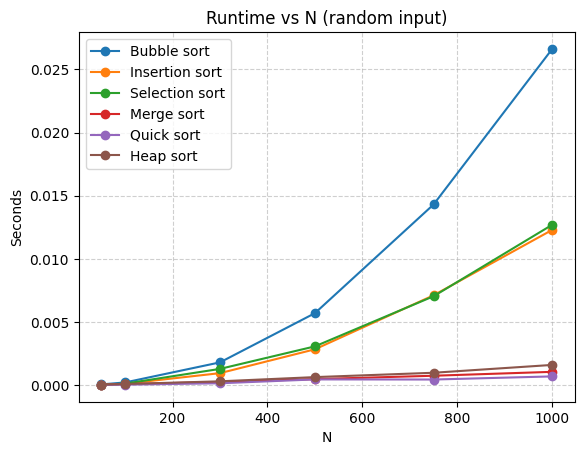

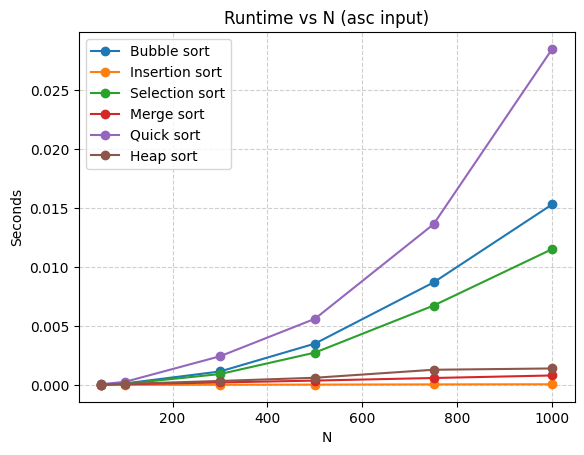

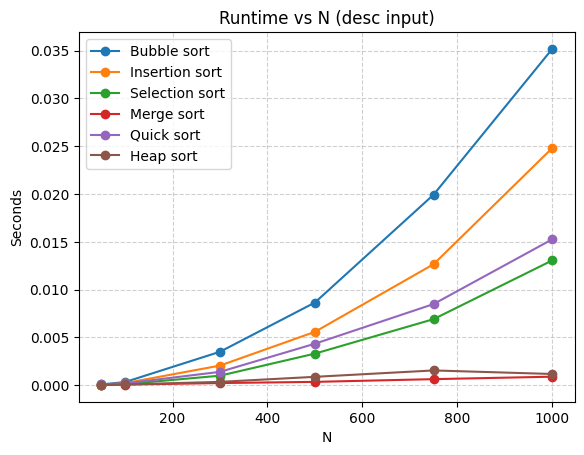

In [ ]:
import random, time
import numpy as np
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):  #loop to access each array element
        for j in range(0, n-i-1): #loop to compare array elements
            if arr[j] > arr[j+1]:  #compare two adjacent elements
                arr[j], arr[j+1] = arr[j+1], arr[j]  #swap if elements are not in the intended order
    return arr

def insertion_sort(arr):
    n = len(arr)  # Get the length of the array

    if n <= 1:
        return arr  # Already sorted if length is 0 or 1

    for i in range(1, n):                # Iterate from the n element
        key = arr[i]                     # Current element to be inserted
        j = i - 1
        while j >= 0 and arr[j] > key:   # Shift elements greater than key to the right
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key                   # Insert the key at the right place

    return arr


def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        # Find the minimum element in remaining unsorted array
        min_idx = i
        for j in range(i+1, n):
            if arr[min_idx] > arr[j]:
                min_idx = j

        # Swap the found minimum element with the first element
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return arr


def merge_sort(arr):
    if len(arr) > 1:
        # Find the mid point
        mid = len(arr) // 2

        # Divide the array into 2 halves
        L = arr[:mid]
        R = arr[mid:]

        # Sort the first half
        merge_sort(L)

        # Sort the second half
        merge_sort(R)

        i = j = k = 0

        # Merge the two halves
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Check if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

    return arr


def quick_sort_main(arr):
    def partition(arr, low, high):     # This function takes the last element as pivot, places the pivot element at its correct position in sorted array, and places all smaller (smaller than or equal to pivot) to left of pivot and all greater elements to right of pivot
        pivot = arr[high]  # pivot
        i = low - 1
        for j in range(low, high):  # Traverse through all elements
            if arr[j] <= pivot:  # If current element is smaller than or equal to pivot
                i += 1   # increment index of smaller element  
                arr[i], arr[j] = arr[j], arr[i]   # swap
        arr[i+1], arr[high] = arr[high], arr[i+1]   # swap the pivot element with the element at i+1 position
        return i + 1

    #  The main function that implements Quick Sort
    def _quick_sort(arr, low, high):
        if low < high:  # If there are at least two elements to sort
            x = partition(arr, low, high)  # x is partitioning index, arr[x] is now at right place
            _quick_sort(arr, low, x-1)   # Recursively sort elements before partition
            _quick_sort(arr, x+1, high)    # Recursively sort elements after partition

    _quick_sort(arr, 0, len(arr)-1)
    return arr



def heapify(arr, n, i):
    largest = i        # Initialize largest as root
    l = 2 * i + 1      # left = 2*i + 1
    r = 2 * i + 2      # right = 2*i + 2

    # If left child exists and is greater than root
    if l < n and arr[l] > arr[largest]:
        largest = l

    # If right child exists and is greater than largest so far
    if r < n and arr[r] > arr[largest]:
        largest = r

    # If largest is not root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, n, largest)  # Recursively heapify the affected subtree

def heap_sort(arr):
    n = len(arr)

    # Build a maxheap
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # swap
        heapify(arr, i, 0)

    return arr


# (bubble_sort, insertion_sort, selection_sort, merge_sort, quick_sort_main, heapify, heap_sort)

ALGORITHMS = {
    "Bubble sort": bubble_sort,
    "Insertion sort": insertion_sort,
    "Selection sort": selection_sort,
    "Merge sort": merge_sort,
    "Quick sort": quick_sort_main,  
    "Heap sort": heap_sort,
}

# ---------------- Experiment ----------------
SIZES = [50, 100, 300, 500, 750, 1000]
TRIALS = 5  # Number of trials per size

def run_case(kind):
    results = {alg: [] for alg in ALGORITHMS}
    for n in SIZES:
        for name, func in ALGORITHMS.items():
            times = []
            for _ in range(TRIALS):
                arr = np.random.randint(-1000, 1000, n).tolist()
                if kind == "asc":
                    arr.sort()
                elif kind == "desc":
                    arr.sort(reverse=True)
                t0 = time.perf_counter()
                out = func(arr)
                t1 = time.perf_counter()
                assert out == sorted(arr)
                times.append(t1 - t0)
            results[name].append(sum(times) / len(times))
    return results

def plot_case(kind):
    results = run_case(kind)
    for name, vals in results.items():
        plt.plot(SIZES, vals, marker="o", label=name)
    plt.xlabel("N")
    plt.ylabel("Seconds")
    plt.title(f"Runtime vs N ({kind} input)")
    plt.legend(); plt.grid(True, ls="--", alpha=0.6)

    plt.show()

plot_case("random")
plot_case("asc")
plot_case("desc")


# Extra Homework

In [ ]:
# Implement Selection Sort as recursive function.
def selection_sort_recursive(arr, start=0):
    if start >= len(arr) - 1:   # Base case: If the starting index is at or beyond the last index, return the array
        return arr

    min_idx = start    # Assume the minimum is the first element of the unsorted part
    for i in range(start + 1, len(arr)):    # Find the index of the minimum element in the unsorted part
        if arr[i] < arr[min_idx]:    # Update min_idx if a smaller element is found
            min_idx = i    

    arr[start], arr[min_idx] = arr[min_idx], arr[start]   # Swap the found minimum element with the first element of the unsorted part
    return selection_sort_recursive(arr, start + 1)   # Recursively call the function for the next index

print(selection_sort_recursive([64, 25, 12, 22, 11]))

[11, 12, 22, 25, 64]


In [55]:
# Implement Bubble Sort as recursive function.
def bubble_sort_recursive(arr, n=None):
    if n is None:    # Initialize n during the first call
        n = len(arr)     # Get the length of the array

    if n == 1:    # Base case: If the array size is 1, it's already sorted
        return arr

    for i in range(n - 1):        # One pass of bubble sort. After this pass, the largest element is moved to the end.
        if arr[i] > arr[i + 1]:        # Compare adjacent elements
            arr[i], arr[i + 1] = arr[i + 1], arr[i]   # Swap if elements are not in the intended order

    return bubble_sort_recursive(arr, n - 1)       # Recursively call the function for the remaining unsorted part

print(bubble_sort_recursive([64, 25, 12, 22, 11]))


[11, 12, 22, 25, 64]


In [56]:
# Implement Insertion Sort as recursive function.
def insertion_sort_recursive(arr, n=None):
    if n is None:    # Initialize n during the first call
        n = len(arr)     # Get the length of the array

    if n <= 1:    # Base case: If the array size is 0 or 1, it's already sorted
        return arr

    # Sort the first n-1 elements
    insertion_sort_recursive(arr, n - 1)

    # Insert the last element at the correct position
    last = arr[n - 1]
    j = n - 2
    while j >= 0 and arr[j] > last:   # Find the correct position for the last element
        arr[j + 1] = arr[j]    # Shift elements to the right
        j -= 1
    arr[j + 1] = last   # Place the last element at its correct position

    return arr

print(insertion_sort_recursive([64, 25, 12, 22, 11]))


[11, 12, 22, 25, 64]
